In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import warnings
from sklearn.preprocessing import StandardScaler

In [69]:
# 🔍 Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [70]:
warnings.filterwarnings("ignore")

In [71]:
dataDir = Path.cwd().parent.parent/'data'
for root, dirs, files in os.walk(dataDir):
    for file in files:
        if file.endswith('.csv'):
            print(file)


auto-mpg-Cleaned.csv
car_data.csv
diabetes1.csv
gold_monthly.csv
HealthInsurance.csv
IRIS.csv
Mall_Customers (1).csv
Mall_Customers.csv
metric_test_data.csv
Monthly_Airline_Passenger_Data.csv
Position_Salaries_Simple.csv
SampleClusterData1.csv


In [ ]:
data = dataDir/'IRIS.csv'
irisData = pd.read_csv(data)

In [73]:
# Quick look at the data
display(irisData.head())
display(irisData.info())
display(irisData.describe())

# Optional: Check for missing values
print(f"Missing:\n{irisData.isnull().sum()}")



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Missing:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


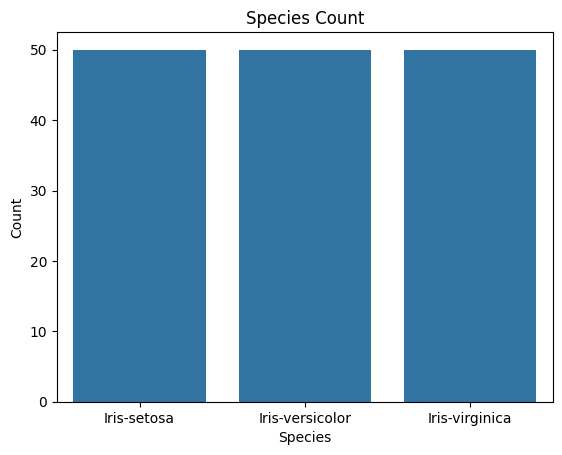

In [74]:

sns.countplot(data=irisData, x="species")
plt.title("Species Count")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


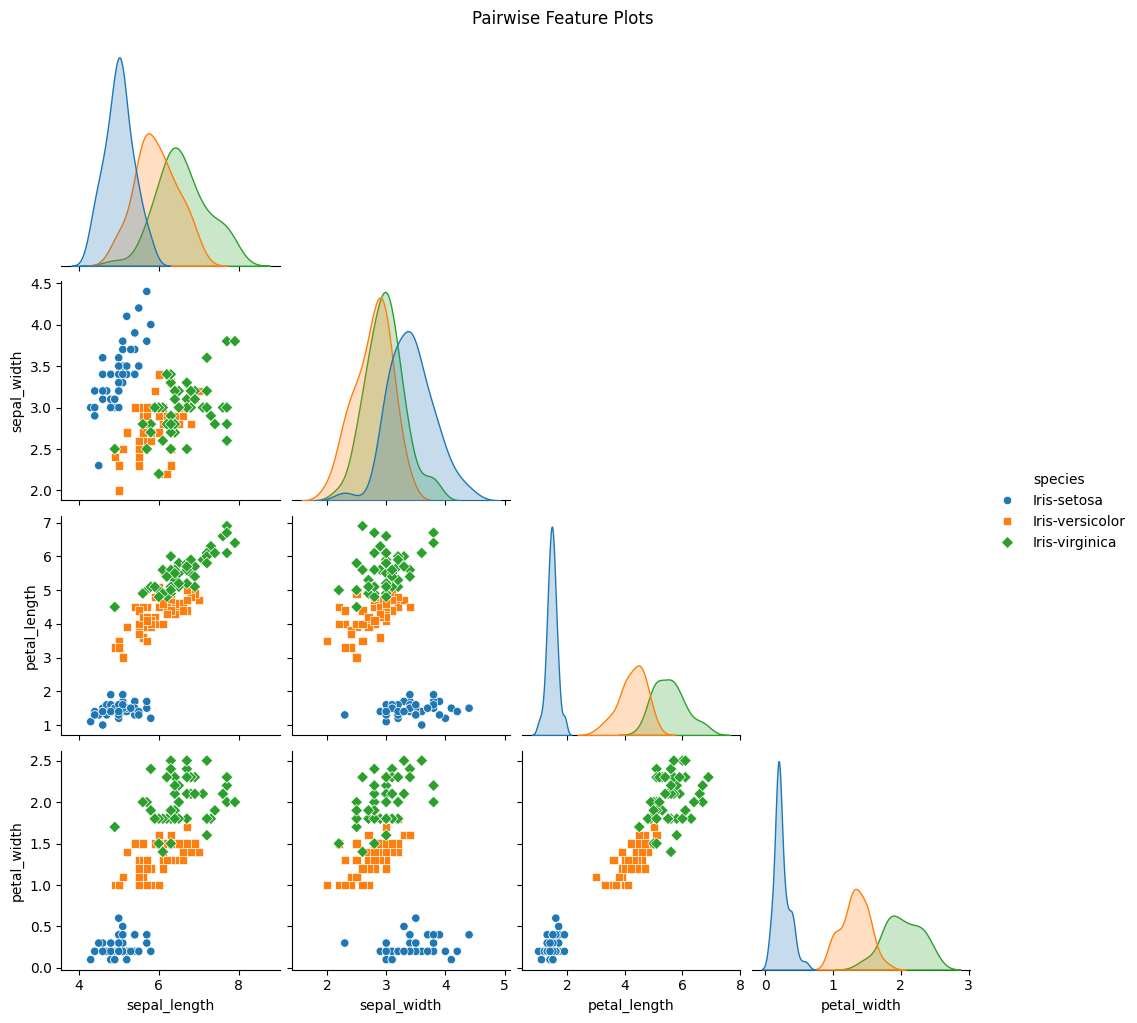

In [75]:
sns.pairplot(irisData, hue="species", corner=True, markers=["o", "s", "D"])
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()


In [76]:
xn = list(irisData.columns[:-1])
yn = irisData.columns[-1]
print(f"Feature names: {xn}")
print(f"Target names: {yn}")

x = irisData[xn].copy()
key = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = irisData[yn].map(key).to_frame()

display(x.head())
display(y.head())

Feature names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Target names: species


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,species
0,0
1,0
2,0
3,0
4,0


In [77]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test split — stratify to keep class balance
x_train, x_test, y_train, y_test = train_test_split(
    x, y.values.ravel(),        # ravel() to make y a 1D array
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Optional sanity check
print(f"Train shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")


Train shape: (120, 4)
Test shape: (30, 4)


Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



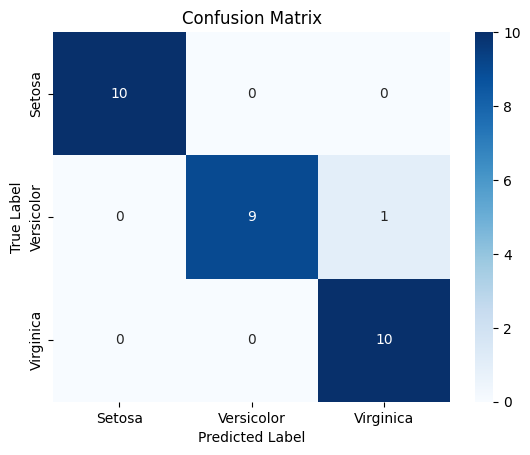

In [78]:
# 1. Train the model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(x_train, y_train)

# 2. Predict on test set
y_pred = log_reg.predict(x_test)

# 3. Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Setosa", "Versicolor", "Virginica"]))

# 4. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [1]:
sns.scatterplot(x=y_pred, y=y_test, hue=y_test, style=y_pred, palette="deep")

NameError: name 'sns' is not defined

KNN Accuracy: 1.0000
Classification Report (KNN):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



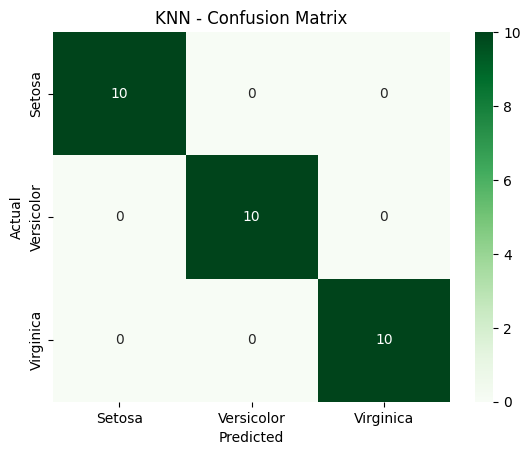

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Create the model (start with k=5)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

# 2. Predict on test set
y_pred_knn = knn_model.predict(x_test)

# 3. Evaluate
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=["Setosa", "Versicolor", "Virginica"]))

# 4. Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


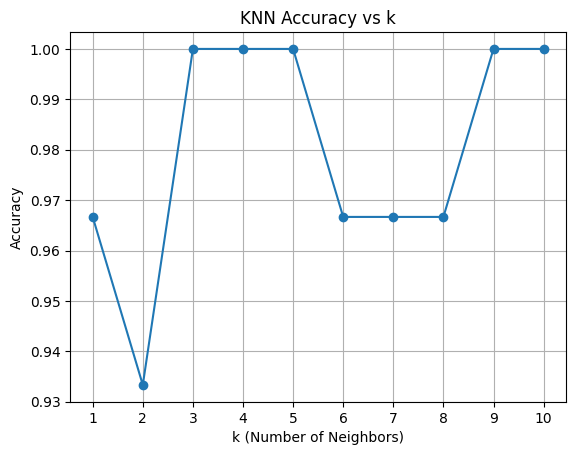

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Try different k values
k_values = range(1, 11)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


SVM Accuracy: 0.9667
Classification Report (SVM):
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



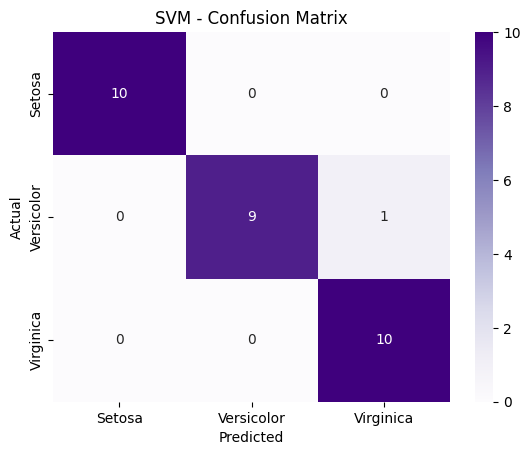

In [88]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Create the model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel (default)
svm_model.fit(x_train, y_train)

# 2. Predict
y_pred_svm = svm_model.predict(x_test)

# 3. Evaluate
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=["Setosa", "Versicolor", "Virginica"]))

# 4. Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
